In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
sns.set_style({"xtick.direction": "in", "ytick.direction": "in"})
%matplotlib inline

## Kinetics in the FES model
We use the denaturant dependent thermodynamics to estimate kinetics at different final denaturant concentrations.

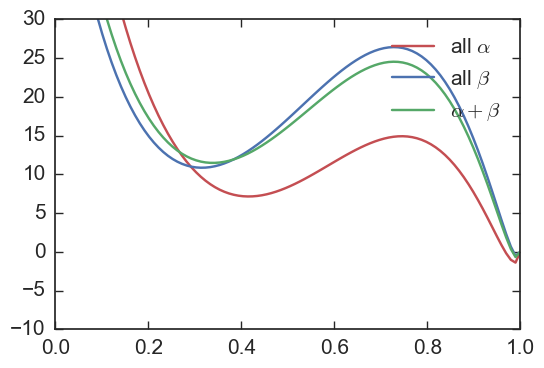

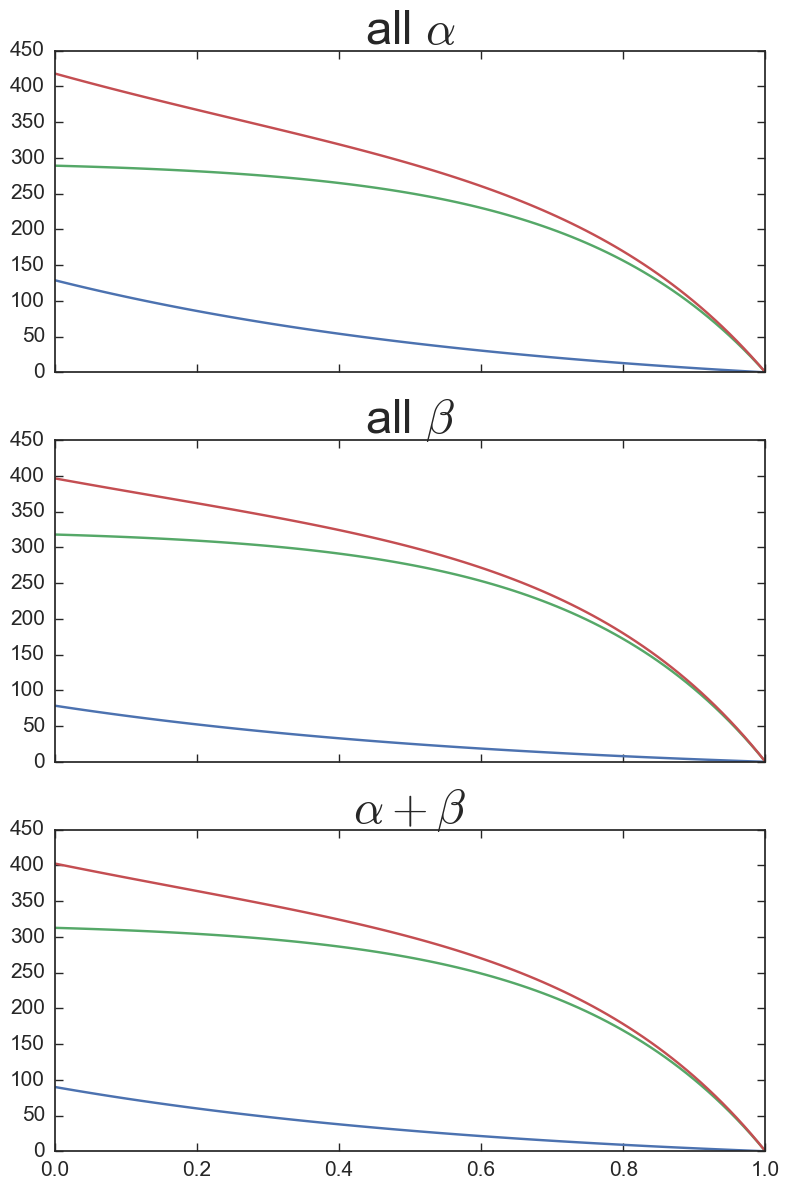

In [7]:
from prefur import kinetics

fig1 ,ax1 = plt.subplots()
fig2 ,ax2 = plt.subplots(3,1, sharey=True, sharex=True, figsize=(8,12))
nres = 60
kf, ku, FES = kinetics.predict(nres=nres, struct='a')
ax1.plot(FES.nat, FES.DG, c='r', label=r'all $\alpha$')
ax2[0].plot(FES.nat, FES.DHo_loc)
ax2[0].plot(FES.nat, FES.DHo_nonloc)
ax2[0].plot(FES.nat, FES.DHo)
kf, ku, FES = kinetics.predict(nres=nres, struct='b')
ax1.plot(FES.nat, FES.DG, c='b', label=r'all $\beta$')
ax2[1].plot(FES.nat, FES.DHo_loc)
ax2[1].plot(FES.nat, FES.DHo_nonloc)
ax2[1].plot(FES.nat, FES.DHo)
kf, ku, FES = kinetics.predict(nres=nres, struct='ab')
ax1.plot(FES.nat, FES.DG, c='g', label=r'$\alpha+\beta$')
ax2[2].plot(FES.nat, FES.DHo_loc)
ax2[2].plot(FES.nat, FES.DHo_nonloc)
ax2[2].plot(FES.nat, FES.DHo)
ax1.set_ylim(-10,30)
ax2[0].set_title(r'all $\alpha$', fontsize=34)
ax2[1].set_title(r'all $\beta$', fontsize=34)
ax2[2].set_title(r'$\alpha+\beta$', fontsize=34)
fig2.tight_layout(w_pad=0)
ax1.legend(loc=1)

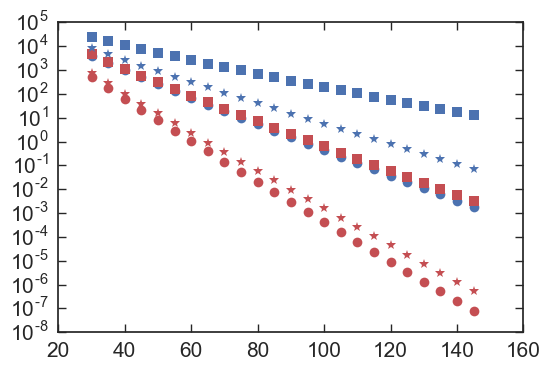

In [3]:
from prefur import kinetics

fold_rates = []
for n in range(30, 150, 5):
    kf, ku, FES = kinetics.predict(nres=n)
    fold_rates.append([kf, ku])
fold_rates = np.array(fold_rates)

plt.semilogy(range(30, 150, 5), fold_rates[:,0], 'bo')
plt.semilogy(range(30, 150, 5), fold_rates[:,1], 'ro')

fold_rates = []
for n in range(30, 150, 5):
    kf, ku, FES = kinetics.predict(nres=n, struct='a')
    fold_rates.append([kf, ku])
fold_rates = np.array(fold_rates)
plt.semilogy(range(30, 150, 5), fold_rates[:,0], 'bs')
plt.semilogy(range(30, 150, 5), fold_rates[:,1], 'rs')


fold_rates = []
for n in range(30, 150, 5):
    kf, ku, FES = kinetics.predict(nres=n, struct='ab')
    fold_rates.append([kf, ku])
fold_rates = np.array(fold_rates)
plt.semilogy(range(30, 150, 5), fold_rates[:,0], 'b*')
plt.semilogy(range(30, 150, 5), fold_rates[:,1], 'r*')


In [4]:
FES.nat[71]

0.71717171717171724